In [1]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.linear_model import LogisticRegression
import random
import pickle

In [2]:
data = np.load("mamba.npy", allow_pickle=True)

data0 = [i[1] for i in data if i[0] == 0]
data1 = [i[1] for i in data if i[0] == 1]
random.shuffle(data0)
random.shuffle(data1)
data0 = data0[:6140]
data1 = data1[:6140]
data0_train = data0[:5000]
data1_train = data1[:5000]
data0_test = data0[5000:]
data1_test = data1[5000:]
data_train = [[i, 0] for i in data0_train] + [[i, 1] for i in data1_train]
random.shuffle(data_train)
data_test = [[i, 0] for i in data0_test] + [[i, 1] for i in data1_test]
random.shuffle(data_test)

In [3]:
x_train = np.asarray([i[0] for i in data_train])
y_train = np.asarray([float(i[1]) for i in data_train])
x_test = np.asarray([i[0] for i in data_test])
y_test = np.asarray([float(i[1]) for i in data_test])

In [4]:
lm = LogisticRegression(penalty="l2", solver="liblinear", C=1)
lm.fit(x_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [5]:
lm.score(x_test, y_test)

0.6105263157894737

In [6]:
lm.score(x_train, y_train)

0.6432

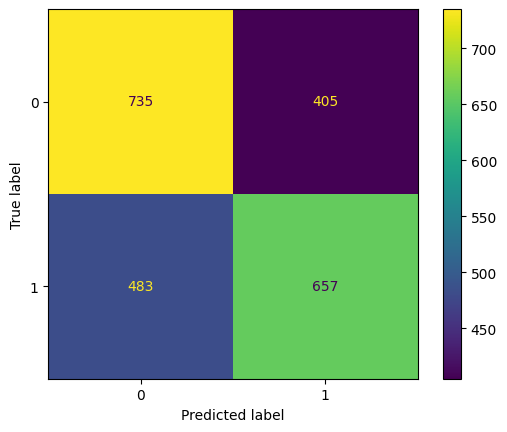

In [7]:
pred = [1 if i[1] >= 0.5 else 0 for i in lm.predict_proba(x_test)]
cm = confusion_matrix(y_test, pred)
displ = ConfusionMatrixDisplay(confusion_matrix=cm)
displ.plot()

In [ ]:
pickle.dump(lm, open("lr-if-alv3.sav", "wb"))